### Program - 1
#### Question: Implement and demonstrate the FIND-S algorithm for finding the most specific hypothesis based on a given set of training data samples. Read the training data from a .CSV file.

In [1]:
import csv
with open("Ex01.csv","r") as f:
    reader=csv.reader(f)
    data=list(reader)
print(data,"\n")
h=['0','0','0','0','0','0']
for row in data:
    if row[-1]=="Yes":
        j=0
        for cell_val in row:
            if cell_val != "Yes":
                if cell_val != h[j] and h[j]=='0':
                    h[j]=cell_val
                elif cell_val != h[j] and h[j]!='0':
                    h[j]="?"
            j=j+1
print(h)

[['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Yes'], ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes'], ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Same', 'No'], ['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Yes']] 

['Sunny', 'Warm', '?', 'Strong', '?', '?']


### Program - 2
#### Question: For a given set of training data examples stored in a .CSV file, implement and Demonstrate the Candidate-Elimination algorithm to output a description of the set of all hypotheses consistent with the training examples.

In [2]:
import numpy as np
import pandas as pd
data1=pd.read_csv('Ex02.csv')
concepts=np.array(data1.iloc[:,0:-1])
target=np.array(data1.iloc[:,-1])
def learn(concepts, target):
    s_h=concepts[0].copy()
    print(s_h)
    g_h=[["?" for i in range(len(s_h))]
        for i in range(len(s_h))]
    print(g_h)
    for i, h in enumerate(concepts):
        if target[i]=="Yes":
            for x in range(len(s_h)):
                if h[x]!=s_h[x]:
                    s_h[x]='?'
                    g_h[x][x]='?'
        if target[i]=="No":
            for x in range(len(s_h)):
                if h[x]!=s_h[x]:
                    g_h[x][x]=s_h[x]
                else:
                    g_h[x][x]='?'
        print(i+1)
        print(s_h)
        print(g_h)
    indices=[i for i, val in enumerate(g_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        g_h.remove(['?', '?', '?', '?', '?', '?'])
    return s_h,g_h
s_f, g_f = learn(concepts, target)
print(s_f)
print(g_f)

['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
1
['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
2
['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
3
['Sunny' 'Warm' 'High' 'Strong' '?' '?']
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
['Sunny' 'Warm' 'High' 'St

### Program - 6
#### Question: Assuming a set of documents that need to be classified, use the naïve Bayesian Classifier model to perform this task. Built-in Java classes/API can be used to write the program. Calculate the accuracy, precision, and recall for your data set.

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas as pd
from sklearn import metrics
twenty_train=fetch_20newsgroups(subset='train', shuffle=True)
print(len(twenty_train))
text_clf=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',MultinomialNB())])
text_clf=text_clf.fit(twenty_train.data,twenty_train.target)
twenty_test=fetch_20newsgroups(subset='test', shuffle=True)
predicted=text_clf.predict(twenty_test.data)
accuracy=np.mean(predicted == twenty_test.target)
print(accuracy)
print(metrics.accuracy_score(twenty_test.target,predicted))
print(metrics.precision_score(twenty_test.target,predicted,average=None))
print(metrics.recall_score(twenty_test.target,predicted,average=None))
print(metrics.classification_report(twenty_test.target,predicted,target_names=twenty_test.target_names))

5
0.7738980350504514
0.7738980350504514
[0.80193237 0.81028939 0.81904762 0.67180617 0.85632184 0.88955224
 0.93127148 0.84651163 0.93686869 0.92248062 0.89170507 0.59379845
 0.83629893 0.92113565 0.84172662 0.43896976 0.64339623 0.92972973
 0.95555556 0.97222222]
[0.52037618 0.64781491 0.65482234 0.77806122 0.77402597 0.75443038
 0.69487179 0.91919192 0.9321608  0.89924433 0.96992481 0.96717172
 0.59796438 0.73737374 0.89086294 0.98492462 0.93681319 0.91489362
 0.41612903 0.13944223]
                          precision    recall  f1-score   support

             alt.atheism       0.80      0.52      0.63       319
           comp.graphics       0.81      0.65      0.72       389
 comp.os.ms-windows.misc       0.82      0.65      0.73       394
comp.sys.ibm.pc.hardware       0.67      0.78      0.72       392
   comp.sys.mac.hardware       0.86      0.77      0.81       385
          comp.windows.x       0.89      0.75      0.82       395
            misc.forsale       0.93      0.69  

### Program - 8B
#### Question: Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using K-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can add Java/Python ML library classes/API in the program.
##### K-Means Algorithm

[5 9 8 4 7 2 3 1 6 4 6]


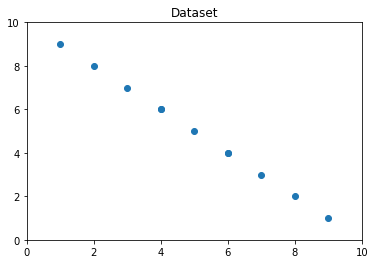

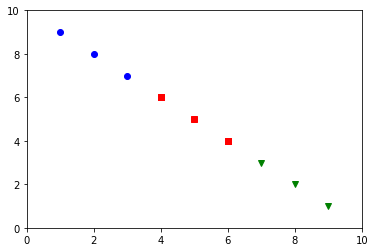

In [4]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import csv
data=[]
ydata=[]
with open("Ex08.csv") as tsv:
    for line in csv.reader(tsv):
        data=[int(i) for i in line]
        ydata=[10-int(i) for i in line]
x1=np.array(data)
x2=np.array(ydata)
print(x1)
plt.plot()
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Dataset')
plt.scatter(x1,x2)
plt.show()
plt.plot()
x=np.array(list(zip(x1,x2))).reshape(len(x1),2)
colors=['b','g','r']
markers=['o','v','s']
K=3
kmeans_model=KMeans(n_clusters=K).fit(x)
plt.plot()
for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i],x2[i],color=colors[l],marker=markers[l],ls='None')
    plt.xlim([0,10])
    plt.ylim([0,10])
plt.show()

### Program - 9
#### Question: Write a program to implement K-Nearest Neighbour algorithm to classify the iris data set. Print both correct and wrong predictions. Java/Python ML library classes can be used for this problem.

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
dataset=pd.read_csv('Ex09.csv')
f_c=['sepal_length','sepal_width','petal_length','petal_width']
x=dataset[f_c].values
y=dataset['species'].values
le=LabelEncoder()
y=le.fit_transform(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)
classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print("Y_Pred  Y_Test")
for i in range(len(y_pred)):
    print(y_pred[i],"\t",y_test[i])
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)*100
print(round(accuracy,2),"%")

Y_Pred  Y_Test
2 	 2
1 	 1
0 	 0
2 	 2
0 	 0
2 	 2
0 	 0
1 	 1
1 	 1
1 	 1
2 	 2
1 	 1
1 	 1
1 	 1
2 	 1
0 	 0
1 	 1
1 	 1
0 	 0
0 	 0
2 	 2
1 	 1
0 	 0
0 	 0
2 	 2
0 	 0
0 	 0
1 	 1
1 	 1
0 	 0
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
96.67 %


### Program - 10
#### Question: Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using K-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can add Java/Python ML library classes/API in the program.

(80, 2)


Text(0, 0.5, 'colB')

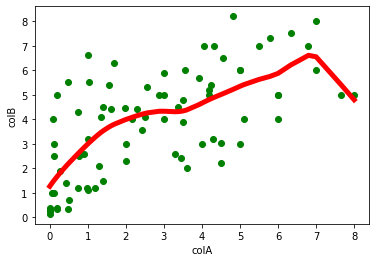

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def kernel(point,xmat,k):
    m,n=np.shape(xmat)
    weights=np.mat(np.eye(m))
    for j in range(m):
        diff=point-x[j]
        weights[j,j]=np.exp(diff*diff.T/(-2.0*k**2))
    return weights
def localWeight(point,xmat,ymat,k):
    wei=kernel(point,xmat,k)
    W=(x.T*(wei*x)).I*(x.T*(wei*ymat.T))
    return W
def localWeightRegression(xmat,ymat,k):
    m,n=np.shape(xmat)
    ypred=np.zeros(m)
    for i in range(m):
        ypred[i]=xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred
data=pd.read_csv('Ex10.csv')
colA=np.array(data.colA)
colB=np.array(data.colB)
mcolA=np.mat(colA)
mcolB=np.mat(colB)
m=np.shape(mcolA)[1]
one=np.ones((1,m),dtype=int)
x=np.hstack((one.T,mcolA.T))
print(x.shape)
ypred=localWeightRegression(x,mcolB,0.5)
SortIndex=x[:,1].argsort(0)
xsort=x[SortIndex][:,0]
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(colA,colB,color='green')
ax.plot(xsort[:,1],ypred[SortIndex],color='red',linewidth=5)
plt.xlabel('colA')
plt.ylabel('colB')